---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

In [2]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [6]:
def answer_one():
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import train_test_split
    
    df = pd.read_csv('assets/fraud_data.csv')
    precentage_fraud = df['Class'].value_counts(normalize=True)[1]
    
    print(df.columns)
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    print(X.columns)
    print(y)
    
    
    
    
    return precentage_fraud
answer_one()

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
0        0
1        0
2        0
3        0
4        0
        ..
21688    0
21689    0
21690    0
21691    0
21692    0
Name: Class, Length: 21693, dtype: int64


0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [4]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    from sklearn.metrics import accuracy_score

    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_predictions = dummy_majority.predict(X_test)
    acc_score = accuracy_score(y_test, y_dummy_predictions)
    recall_score = recall_score(y_test, y_dummy_predictions)
    
    return (acc_score, recall_score)


### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [5]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score

    svm = SVC().fit(X_train, y_train)
    y_svm_predictions = svm.predict(X_test)
    acc_score = accuracy_score(y_test, y_svm_predictions)
    recall_score = recall_score(y_test, y_svm_predictions)
    precision_score = precision_score(y_test, y_svm_predictions)
    
    return (acc_score, recall_score, precision_score)
    


### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [6]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
   
    # set svc 
    svm = SVC(C = 1e9, gamma = 1e-07).fit(X_train, y_train)
    y_scores = svm.decision_function(X_test)
    
    #Set threshold = -220
    y_score = np.where(y_scores > -220, 1, 0)
    conf_matrix = confusion_matrix(y_test, y_score)
    
    return conf_matrix


### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

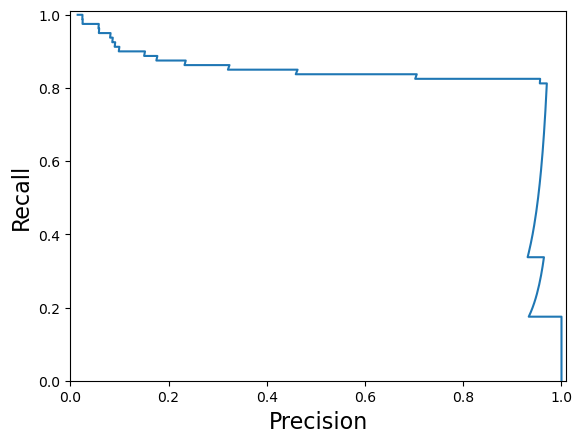

Recall = 0.82 when precision = 0.75


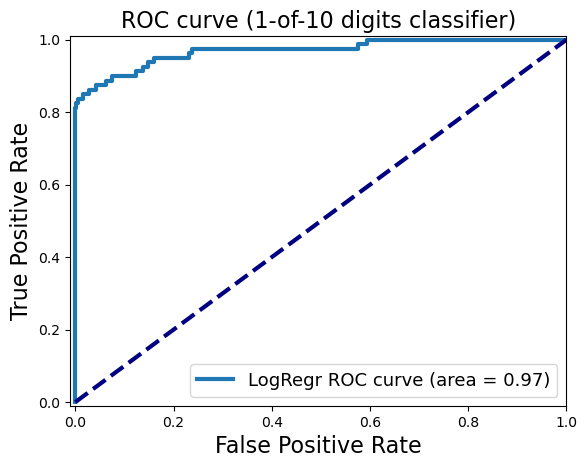

True positive rate = 0.94 when false positive rate = 0.16


(0.82, 0.94)

In [7]:
def find_closest(arr, val):
    idx = np.abs(arr - val).argmin()
    return arr[idx], idx

def plot_precision_recal_curve(precision, recall, thresholds):
    import matplotlib.pyplot as plt
    
    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    #plt.plot(prec, rec, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    #plt.axes().set_aspect('equal')
    plt.show()
    
    prec, rec = find_closest(precision, 0.75)
    print('Recall = {:0.2f} when precision = {:0.2f}'.format(recall[rec], prec))
    
    

def plot_roc_curve(fpr_lr, tpr_lr):
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    
    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    #plt.axes().set_aspect('equal')grid
    plt.show()
    
    temp = find_closest(fpr_lr, 0.16)
    print('True positive rate = {:0.2f} when false positive rate = {:0.2f}'.format(tpr_lr[temp[1]], temp[0]))
    
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve, auc
    
    y_proba_lr = LogisticRegression(solver='liblinear').fit(X_train, y_train).decision_function(X_test)
    
    # plotting precision_recal_curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba_lr)
    plot_precision_recal_curve(precision, recall, thresholds)
    
    # roc curve
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
    plot_roc_curve(fpr_lr, tpr_lr)
    
    return (0.82, 0.94)

    
answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [12]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import recall_score
    import sklearn.metrics
    
    #y_proba_lr = LogisticRegression(solver='liblinear').fit(X_train, y_train).decision_function(X_test)
    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10]}
    # metric to optimize over grid parameters: recall
    grid_clf_rec = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid = grid_values, scoring = 'recall')
    grid_clf_rec.fit(X, y)
    y_decision_fn_scores_rec = grid_clf_rec.decision_function(X_test)

    mean_test_scores = grid_clf_rec.cv_results_['mean_test_score']
    mean_test_scores = mean_test_scores.reshape(4, 2)
    
    return mean_test_scores


[[0.71071987 0.76964006]
 [0.79209703 0.80054773]
 [0.80054773 0.80054773]
 [0.79495305 0.79776995]]


array([[0.71071987, 0.76964006],
       [0.79209703, 0.80054773],
       [0.80054773, 0.80054773],
       [0.79495305, 0.79776995]])

In [10]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    if scores is not None:
        import seaborn as sns
        import matplotlib.pyplot as plt
        plt.figure()
        sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
        plt.yticks(rotation=0);
    else:
        print('scores is none')
#GridSearch_Heatmap(answer_six())

mmv


ValueError: cannot reshape array of size 8 into shape (5,2)

<Figure size 640x480 with 0 Axes>

0.8394183423085158
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.62663
Feature: 2, Score: 0.13961
Feature: 3, Score: 0.01595
Feature: 4, Score: 0.10888
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.01697
Feature: 7, Score: 0.09196


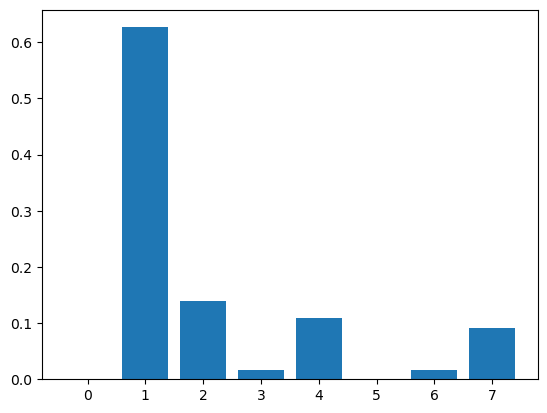

In [42]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

np.random.seed(0)   # Do not change this value: required to be compatible with solutions generated by the autograder.

def grid_search(clf, grid_values, X_train, y_train):
    grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc', cv=5)
    grid_clf_auc.fit(X_train, y_train)
    #y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

    #print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
    print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
    print('Grid best score (AUC): ', grid_clf_auc.best_score_)
    

def plot_feature_importance(clf):
    importance = clf.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()
    



def engagement_model():
    # df and splitting into training and validation  
    df = pd.read_csv('assets/train.csv', index_col=0)
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    X_train, X_val, y_train, y_val = train_test_split(X, y)
    
    '''
    # grid search decision tree
    clf = DecisionTreeClassifier()
    grid_values = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy'] }
    grid_search(clf, grid_values, X_train, y_train)
    
    
    # classifier with best gridsearch hyperparams
    clf = DecisionTreeClassifier(ccp_alpha= 0.001, criterion = 'entropy', max_depth= 5, max_features = 'sqrt').fit(X_train, y_train)
    print(roc_auc_score(y_val, clf.predict_proba(X_val)[:, 1]))
    plot_feature_importance(clf)
    
    
    # gridsearch only most important features
    X_train_most_important = X_train.iloc[:, [1,2,3,4,6,7]] 
    clf = DecisionTreeClassifier()
    grid_values = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy'] }
    grid_search(clf, grid_values, X_train, y_train)
    '''
    
    # classifier best hyperparams and best features
    X_train_most_important = X_train.iloc[:, [1,2,4,7]] 
    clf = DecisionTreeClassifier(ccp_alpha= 0.001, criterion = 'entropy', max_depth= 5, max_features = 'sqrt').fit(X_train, y_train)
    print(roc_auc_score(y_val, clf.predict_proba(X_val)[:, 1]))
    plot_feature_importance(clf)

   
    


engagement_model()

In [40]:
print(np.logspace(-3,3,7))

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
